In [22]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [23]:

# fix random seed for reproducibility
numpy.random.seed(7)

df = pd.read_csv('airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])




In [24]:
split_date = pd.datetime(1958,12,31)

df_training = df.loc[df['Month'] <= split_date]
df_test = df.loc[df['Month'] > split_date]
train = df_training.iloc[:, 1:2].values
test = df_test.iloc[:, 1:2].values

In [25]:
# convert an array of values into a df matrix
def create_df(df, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df)-look_back-1):
        a = df[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the df
scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test = scaler.fit_transform(test)
# split into train and test sets
train_size = len(train)
test_size = len(test)

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_df(train, look_back)
testX, testY = create_df(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [26]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=2)


Epoch 1/150
 - 5s - loss: 0.0936
Epoch 2/150
 - 1s - loss: 0.0342
Epoch 3/150
 - 1s - loss: 0.0237
Epoch 4/150
 - 1s - loss: 0.0194
Epoch 5/150
 - 1s - loss: 0.0159
Epoch 6/150
 - 1s - loss: 0.0133
Epoch 7/150
 - 1s - loss: 0.0117
Epoch 8/150
 - 1s - loss: 0.0108
Epoch 9/150
 - 1s - loss: 0.0101
Epoch 10/150
 - 1s - loss: 0.0098
Epoch 11/150
 - 1s - loss: 0.0095
Epoch 12/150
 - 1s - loss: 0.0096
Epoch 13/150
 - 1s - loss: 0.0097
Epoch 14/150
 - 1s - loss: 0.0098
Epoch 15/150
 - 1s - loss: 0.0092
Epoch 16/150
 - 1s - loss: 0.0093
Epoch 17/150
 - 1s - loss: 0.0091
Epoch 18/150
 - 1s - loss: 0.0097
Epoch 19/150
 - 1s - loss: 0.0091
Epoch 20/150
 - 1s - loss: 0.0091
Epoch 21/150
 - 1s - loss: 0.0090
Epoch 22/150
 - 1s - loss: 0.0090
Epoch 23/150
 - 1s - loss: 0.0090
Epoch 24/150
 - 1s - loss: 0.0089
Epoch 25/150
 - 1s - loss: 0.0089
Epoch 26/150
 - 1s - loss: 0.0088
Epoch 27/150
 - 1s - loss: 0.0088
Epoch 28/150
 - 1s - loss: 0.0087
Epoch 29/150
 - 1s - loss: 0.0087
Epoch 30/150
 - 1s - lo

In [27]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



Train Score: 17.00 RMSE
Test Score: 44.47 RMSE


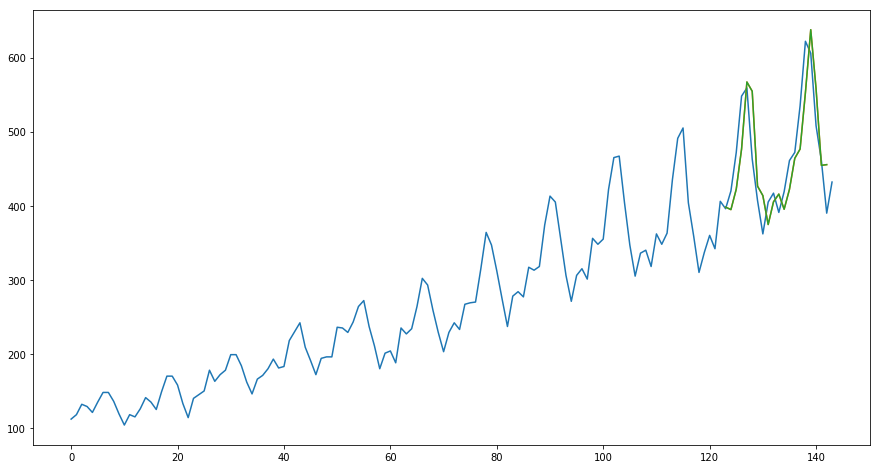

In [33]:
# shift train predictions for plotting
#trainPredictPlot = numpy.empty_like(df)
#trainPredictPlot[:, :] = numpy.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(df['Passengers'])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gcf().set_size_inches(15, 8)
plt.show()
